In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
from src.weatherbench.score import *

In [2]:
sns.set_style('darkgrid')
sns.set_context('notebook')

In [3]:
res = '5.625'
DATADIR = f'/home/visgean/Downloads/weather/'
PREDDIR = '/home/visgean/Downloads'

In [4]:
# Load the validation subset of the data: 2017 and 2018
z500_valid = load_test_data(f'{DATADIR}geopotential_500', 'z')
t850_valid = load_test_data(f'{DATADIR}temperature_850', 't')
valid_data = xr.merge([z500_valid, t850_valid], compat='override')

In [20]:
pred = xr.load_dataset('/home/visgean/Downloads/predictions')
pred_baseline = xr.load_dataset('/home/visgean/Downloads/predictions_baseline')

In [6]:
pred

<xarray.Dataset>
Dimensions:  (lat: 32, lon: 64, time: 17440)
Coordinates:
  * time     (time) datetime64[ns] 2017-01-04T08:00:00 ... 2018-12-31T23:00:00
  * lat      (lat) float64 -87.19 -81.56 -75.94 -70.31 ... 75.94 81.56 87.19
  * lon      (lon) float64 0.0 5.625 11.25 16.88 ... 337.5 343.1 348.8 354.4
Data variables:
    z        (time, lat, lon) float32 50431.91 50371.008 ... 49375.457 49417.215
    t        (time, lat, lon) float32 255.73973 255.11862 ... 250.37924

In [7]:
import cartopy.crs as ccrs

sns.set_style('dark')

In [8]:
cmap_z = 'cividis'
cmap_t = 'RdYlBu_r'
cmap_diff = 'bwr'
cmap_error = 'BrBG'

def imcol(ax, data, title='', **kwargs):
    if not 'vmin' in kwargs.keys():
        mx = np.abs(data.max().values)
        kwargs['vmin'] = -mx; kwargs['vmax'] = mx
#     I = ax.imshow(data, origin='lower',  **kwargs)
    I = data.plot(ax=ax, transform=ccrs.PlateCarree(), add_colorbar=False, add_labels=False, 
                  rasterized=True, **kwargs)
    cb = fig.colorbar(I, ax=ax, orientation='horizontal', pad=0.01, shrink=0.90)
    ax.set_title(title)
    ax.coastlines(alpha=0.5)

In [9]:
start_time = "2017-01-04T08:00:00"
pred_time = "2017-04-04T08:00:00"

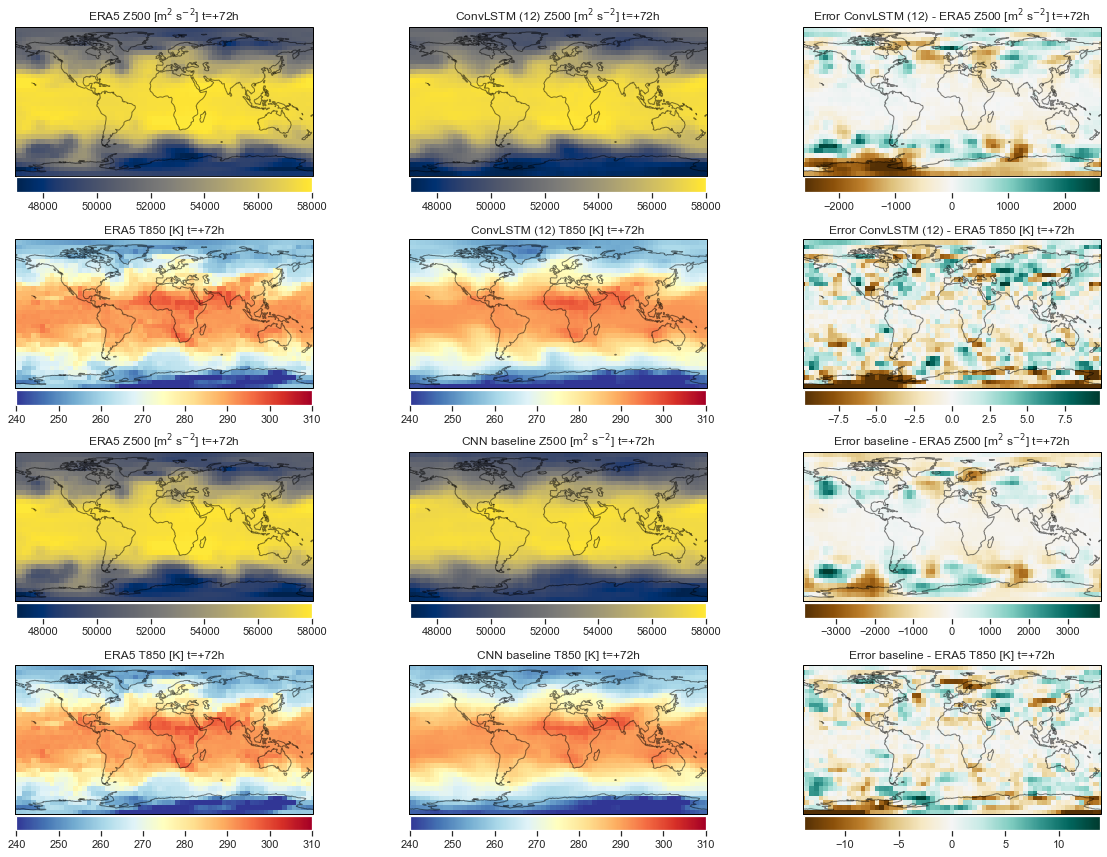

In [28]:
fig, axs = plt.subplots(4, 3, figsize=(20, 15), subplot_kw={'projection': ccrs.PlateCarree()})
# True
# for iax, var, cmap, r, t in zip(
#     [0, 1], ['z', 't'], [cmap_z, cmap_t], [[47000, 58000], [240, 310]], [r'Z500 [m$^2$ s$^{-2}$]', 'T850 [K]']):
#     imcol(axs[iax,0], valid_data[var].sel(time=start_time), cmap=cmap, 
#           vmin=r[0], vmax=r[1], title=f'ERA5 {t} t={start_time}')
#     imcol(axs[iax,1], valid_data[var].sel(time=pred_time), cmap=cmap, 
#           vmin=r[0], vmax=r[1], title=f'ERA5 {t} t=+72h')
#     imcol(axs[iax,2],
#         valid_data[var].sel(time=pred_time) - valid_data[var].sel(time=start_time), cmap=cmap_diff, 
#         title=f'ERA5 {t} diff ')

# model
for iax, var, cmap, r, t in zip(
    [0, 1], ['z', 't'], [cmap_z, cmap_t], [[47000, 58000], [240, 310]], [r'Z500 [m$^2$ s$^{-2}$]', 'T850 [K]']):
    imcol(axs[iax,0], valid_data[var].sel(time=pred_time), cmap=cmap, 
          vmin=r[0], vmax=r[1], title=f'ERA5 {t} t=+72h')
    imcol(axs[iax,1], pred[var].sel(time=pred_time), cmap=cmap, 
          vmin=r[0], vmax=r[1], title=f'ConvLSTM (12) {t} t=+72h')
    imcol(axs[iax,2], 
        pred[var].sel(time=pred_time) -valid_data[var].sel(time=pred_time), cmap=cmap_error,
        title=f'Error ConvLSTM (12) - ERA5 {t} t=+72h')

for iax, var, cmap, r, t in zip(
    [2, 3], ['z', 't'], [cmap_z, cmap_t], [[47000, 58000], [240, 310]], [r'Z500 [m$^2$ s$^{-2}$]', 'T850 [K]']):
    imcol(axs[iax,0], valid_data[var].sel(time=pred_time), cmap=cmap, 
          vmin=r[0], vmax=r[1], title=f'ERA5 {t} t=+72h')
    imcol(axs[iax,1], pred_baseline[var].sel(time=pred_time), cmap=cmap, 
          vmin=r[0], vmax=r[1], title=f'CNN baseline {t} t=+72h')
    imcol(axs[iax,2], 
        pred_baseline[var].sel(time=pred_time) -valid_data[var].sel(time=pred_time), cmap=cmap_error,
        title=f'Error baseline - ERA5 {t} t=+72h')
fig.savefig("/home/visgean/map.pdf")